
## **Adopter Prediction Challenge**

 ~ Ankita, Ashok, Kaydee, Young
 
 ---

Website XYZ, a music-listening social networking website, follows the “freemium” business model. The website offers basic services for free, and provides a number of additional premium capabilities for a monthly subscription fee. We are interested in predicting which people would be likely to convert from free users to premium subscribers in the next 6 month period, if they are targeted by our promotional campaign.

### Dataset

We have a dataset from the previous marketing campaign which targeted a number of non-subscribers.

Features: 

```
1.   adopter (predictor class)
2.   user_id
3.   age
4.   male
5.   friend_cnt
6.   avg_friend_age
7.   avg_friend_male
8.   friend_country_cnt
9.   subscriber_friend_cnt
10.   songsListened
11.   lovedTracks
12.   posts
13.   playlists
14.   shouts
15.   good_country
16.   tenure
17.   *other delta variables*
```



### Task

The task is to build the best predictive model for the next marketing campaign, i.e., for predicting likely `adopters` (that is, which current non- subscribers are likely to respond to the marketing campaign and sign up for the premium service within 6 months after the campaign).

---

### EDA

Performing some rudimentary EDA

In [1]:
!pip3 install sklearn

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from google.colab import drive
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, classification_report, recall_score, f1_score

from imblearn.over_sampling import SMOTE

In [3]:
#drive.mount('/content/drive/')

# data = pd.read_csv('https://raw.githubusercontent.com/ashok133/Adopter-Prediction-Challenge/master/LabelData.csv')
data = pd.read_csv('https://drive.google.com/uc?export=view&id=1IcXGkzaVFFMYCzauBLZ7ZQiH32EmJedR')

data.head()

,user_id,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,...,delta_subscriber_friend_cnt,delta_songsListened,delta_lovedTracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country,adopter
0,10,24,0,20,26.333333,0.777778,6,0,37804,4,...,0,54,0,0,0,0,79,0,0,0
1,58,29,1,12,26.900000,0.818182,6,1,15955,19,...,0,802,0,0,0,1,80,0,0,0
2,72,22,0,4,21.000000,1.000000,2,0,31441,7,...,0,0,0,0,0,0,53,0,0,0
3,121,27,0,1,29.000000,1.000000,1,0,0,0,...,0,0,0,0,0,0,59,0,0,0
4,137,22,1,4,21.250000,0.750000,1,0,774,0,...,0,0,0,0,0,0,60,0,0,0


Plotting distribution of user_id


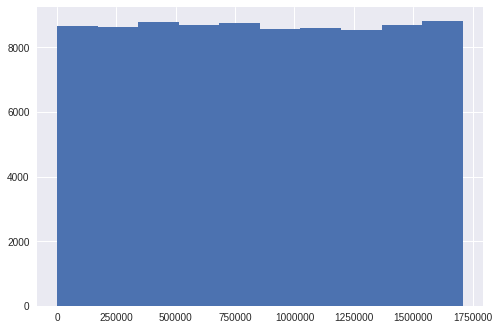

Plotting distribution of age


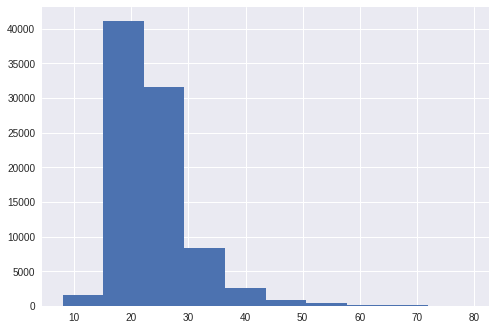

Plotting distribution of male


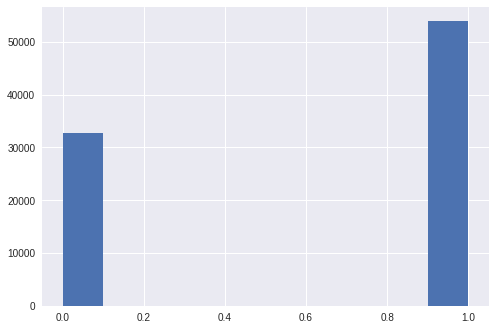

Plotting distribution of friend_cnt


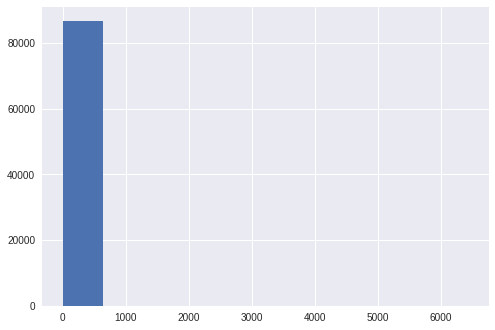

Plotting distribution of avg_friend_age


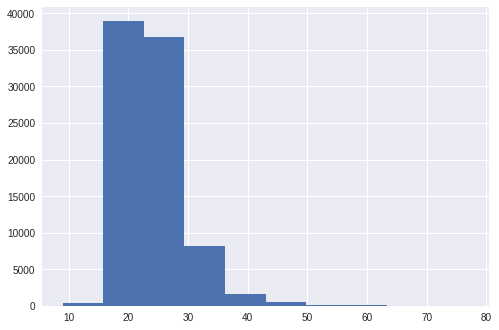

Plotting distribution of avg_friend_male


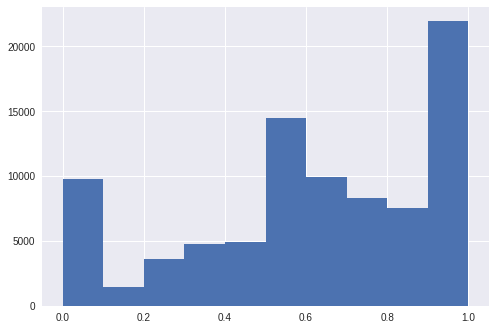

Plotting distribution of friend_country_cnt


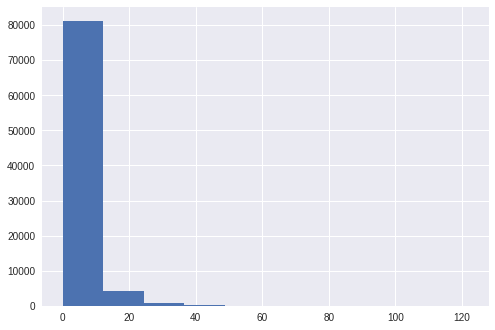

Plotting distribution of subscriber_friend_cnt


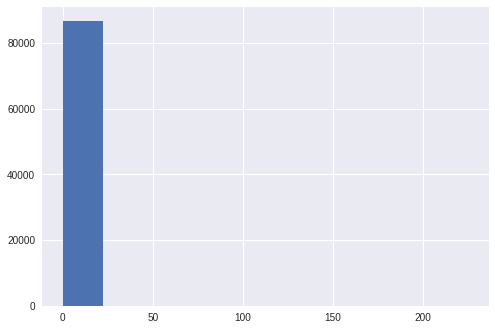

Plotting distribution of songsListened


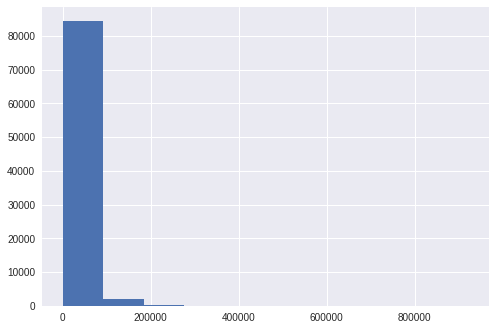

Plotting distribution of lovedTracks


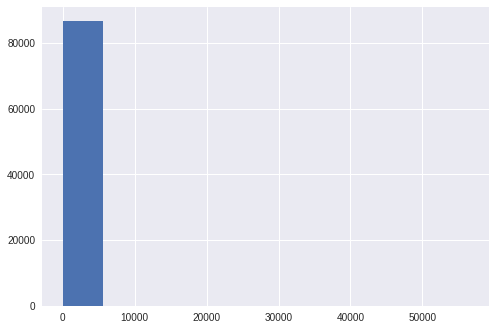

Plotting distribution of posts


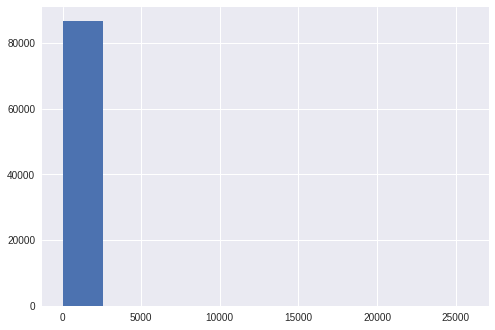

Plotting distribution of playlists


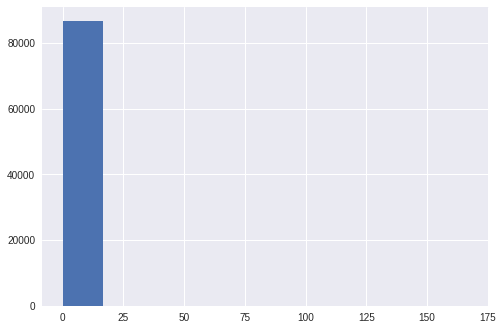

Plotting distribution of shouts


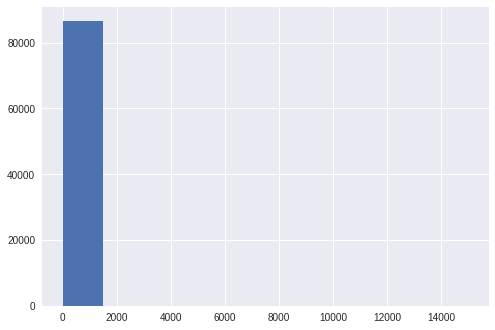

Plotting distribution of delta_friend_cnt


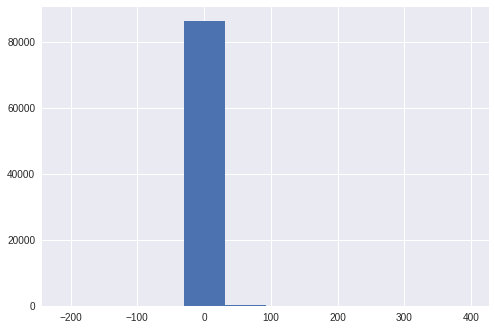

Plotting distribution of delta_avg_friend_age


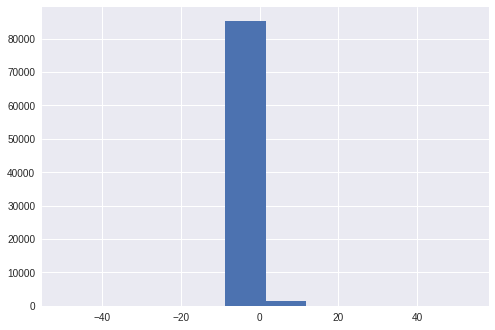

Plotting distribution of delta_avg_friend_male


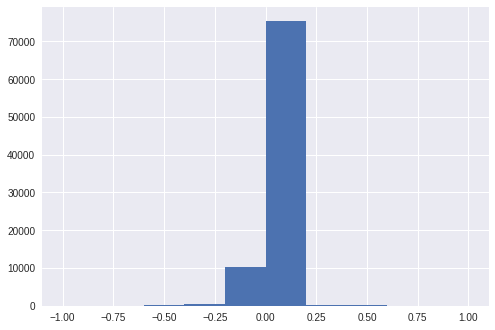

Plotting distribution of delta_friend_country_cnt


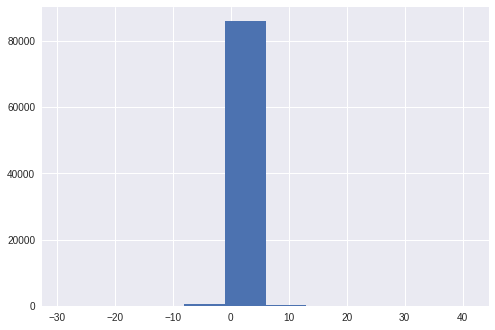

Plotting distribution of delta_subscriber_friend_cnt


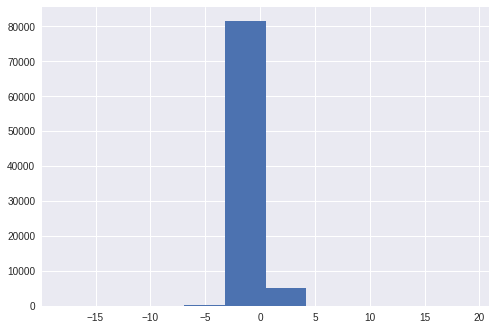

Plotting distribution of delta_songsListened


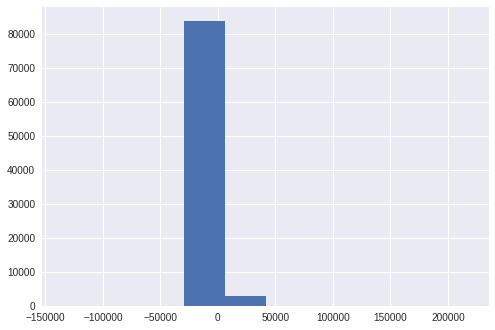

Plotting distribution of delta_lovedTracks


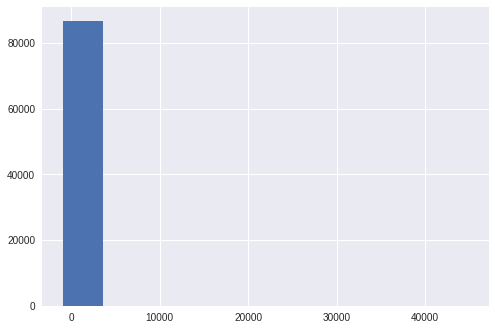

Plotting distribution of delta_posts


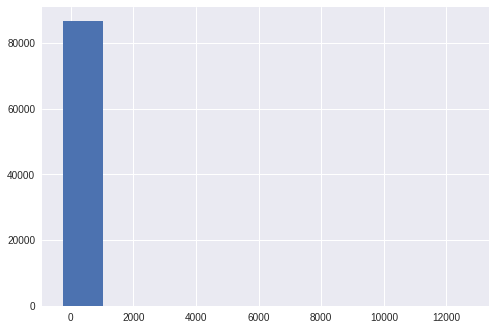

Plotting distribution of delta_playlists


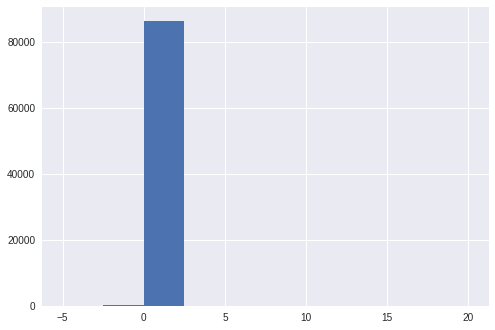

Plotting distribution of delta_shouts


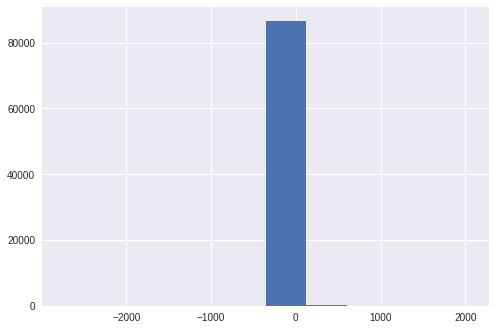

Plotting distribution of tenure


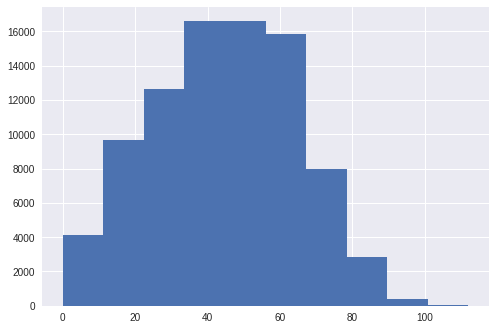

Plotting distribution of good_country


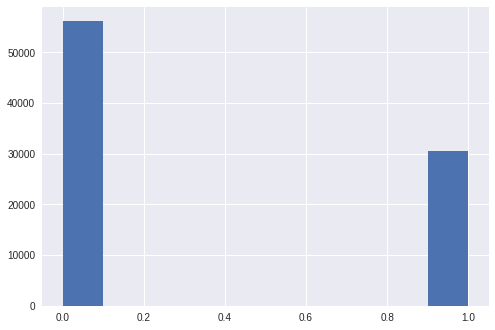

Plotting distribution of delta_good_country


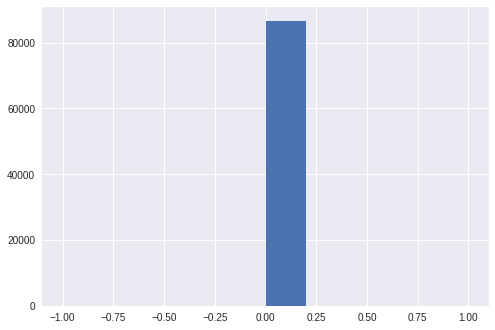

Plotting distribution of adopter


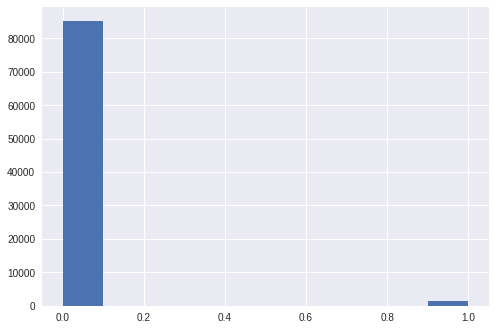

In [4]:
# checking each feature's distribution

for col in data.columns:
  feature_hist = data[col].hist(bins=10)
  print ("Plotting distribution of {}".format(col))
  plt.show()

Except for `age`, `avg_friend_age`,  `avg_friend_male` and `tenure`, all other features are heavily imbalanced.

Let's check the adopter class.

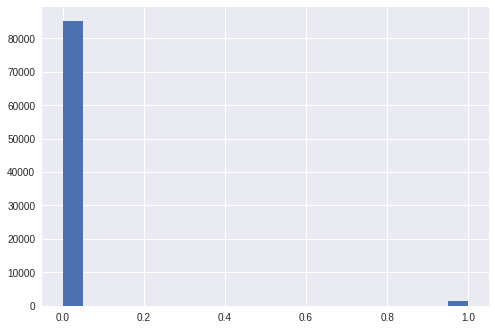

In [5]:
adopter_hist = data['adopter'].hist(bins=20)
plt.show()

  `adopter` class is heavily imbalanced. This calls for some form of resampling. Let's skip feature engineering for now and build a basic model with resampled data to see what can be improved.
  

TODO: Let's normalize the features before resampling. We use minmax normalisation across each colum of the dataframe

In [6]:
## All features

list(data)

['user_id',
 'age',
 'male',
 'friend_cnt',
 'avg_friend_age',
 'avg_friend_male',
 'friend_country_cnt',
 'subscriber_friend_cnt',
 'songsListened',
 'lovedTracks',
 'posts',
 'playlists',
 'shouts',
 'delta_friend_cnt',
 'delta_avg_friend_age',
 'delta_avg_friend_male',
 'delta_friend_country_cnt',
 'delta_subscriber_friend_cnt',
 'delta_songsListened',
 'delta_lovedTracks',
 'delta_posts',
 'delta_playlists',
 'delta_shouts',
 'tenure',
 'good_country',
 'delta_good_country',
 'adopter']

In [7]:
## Checking for missing values

def numMissingValues(x):
  return sum(x.isnull())

print ('Checking missing values in each feature:')
print (data.apply(numMissingValues, axis = 0))

Checking missing values in each feature:
user_id                        0
age                            0
male                           0
friend_cnt                     0
avg_friend_age                 0
avg_friend_male                0
friend_country_cnt             0
subscriber_friend_cnt          0
songsListened                  0
lovedTracks                    0
posts                          0
playlists                      0
shouts                         0
delta_friend_cnt               0
delta_avg_friend_age           0
delta_avg_friend_male          0
delta_friend_country_cnt       0
delta_subscriber_friend_cnt    0
delta_songsListened            0
delta_lovedTracks              0
delta_posts                    0
delta_playlists                0
delta_shouts                   0
tenure                         0
good_country                   0
delta_good_country             0
adopter                        0
dtype: int64


In [8]:
data.describe(include = 'all')

,user_id,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,...,delta_subscriber_friend_cnt,delta_songsListened,delta_lovedTracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country,adopter
count,8.668200e+04,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,...,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000,86682.000000
mean,8.547774e+05,23.993067,0.622217,18.988521,24.068308,0.617246,4.040147,0.434935,18193.939849,89.276032,...,-0.021054,942.677188,4.716723,0.279158,0.002757,0.954500,44.350061,0.352045,0.000242,0.017766
std,4.938304e+05,6.388225,0.484836,57.934430,5.127068,0.318587,5.843532,1.853233,28684.095167,320.788514,...,0.534960,2856.036359,155.648950,43.782235,0.177153,19.209259,19.707058,0.477611,0.034803,0.132101
min,1.000000e+01,8.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-18.000000,-135022.000000,-951.000000,-264.000000,-5.000000,-2752.000000,0.000000,0.000000,-1.000000,0.000000
25%,4.279675e+05,20.000000,0.000000,3.000000,20.750000,0.428571,1.000000,0.000000,1347.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000
50%,8.520060e+05,23.000000,1.000000,7.000000,23.000000,0.666667,2.000000,0.000000,7781.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000
75%,1.282592e+06,26.000000,1.000000,18.000000,26.157895,0.900000,4.000000,0.000000,23583.000000,74.000000,...,0.000000,913.000000,0.000000,0.000000,0.000000,0.000000,59.000000,1.000000,0.000000,0.000000
max,1.708942e+06,79.000000,1.000000,6437.000000,77.000000,1.000000,122.000000,225.000000,922370.000000,56389.000000,...,19.000000,217876.000000,44900.000000,12702.000000,20.000000,2036.000000,112.000000,1.000000,1.000000,1.000000


In [0]:
# TODO: Is normalisation needed?
#norm_features = ['']

#norm_data = (data - data.min) / (df.max() - df.min())
#norm_data.head()

## Resampling the data

As the data is heavily imbalanced, we need to resample. We can consider 2 approaches:

1.   Undersampling
2.   Oversampling

There are other sampling techniques (ROSE and SMOTE) that we'll try later. For now, we choose to undersample the data to set a benchmark. 

In [10]:
#TODO: Try ROSE and SMOTE

# fetching number of data points in minority class
num_minority = len(data[data.adopter == 1])
print(num_minority)

1540


Number of minority instances = 1540 which is roughly 1.7% of the total number of instances. 

In [11]:
# fetching the indices of minority instances
adopting_indices = np.array(data[data.adopter == 1].index)

# fetching indices of normal instances
non_adopting_indices = data[data.adopter == 0].index

# randomly select 1540 normal instances to create a 50/50 partitioned balanced dataset
random_non_adopting_indices = np.random.choice(non_adopting_indices,
                                            num_minority,
                                            replace = False)
random_non_adopting_indices = np.array(random_non_adopting_indices)

# combining both the instance groups (minority and the new random set) 
undersampled_indices = np.concatenate([adopting_indices, random_non_adopting_indices])

# creating the undersampled dataset
undersampled_data = data.iloc[undersampled_indices, :]

# storing the features(X) and predictor class(y)
X_undersample = undersampled_data.iloc[:, undersampled_data.columns != 'adopter']
y_undersample = undersampled_data.iloc[:, undersampled_data.columns == 'adopter']

print("Number of minority instances: {}\nNumber of normal instances: {} \nTotal: {}".format(len(undersampled_data[undersampled_data.adopter == 1]), 
                                                                                           len(undersampled_data[undersampled_data.adopter == 0]),
                                                                                           len(undersampled_data)))

Number of minority instances: 1540
Number of normal instances: 1540 
Total: 3080


## Splitting data and shoving training data into a log regressor

In [12]:
# splitting original dataset into features and predictor
X = data.iloc[:, data.columns != 'adopter']
y = data.iloc[:, data.columns == 'adopter']

# splitting the original dataset for cross-validation (0.7 train, 0.3 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print ("Original Data:")
print ("Number of train instances: {}".format(len(X_train)))
print ("Number of test instances: {}".format(len(X_test)))

# splitting the undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state = 0)

print ("Undersampled Data:")
print ("Number of train instances: {}".format(len(X_train_undersample)))
print ("Number of test instances: {}".format(len(X_test_undersample)))
print (type(X_train_undersample))


Original Data:
Number of train instances: 60677
Number of test instances: 26005
Undersampled Data:
Number of train instances: 2156
Number of test instances: 924
<class 'pandas.core.frame.DataFrame'>


Before we build the model to test our data on, we need to fix on the C - parameter. We will consider recall as the metric to iterate over different C-param value and chose the best C-param that gives the best recall rate. 

more on C-param here: https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul 

In [0]:
# function to loop over different C-param values and choose the one with best recall score
c_params = [0.01, 0.1, 1, 10, 100, 1000]

def mean_recalls_with_c_params(X_train, y_train):
  
  '''
  Trains a regressor with KFold for multiple C parameter values and returns the C-param for the regressor with best recall
  '''
  
  # getting the different fold for KFold
  fold = KFold(n_splits=5, random_state=None, shuffle=False)
  
  # storing mean recall rates in a dataframe
  recall_results = pd.DataFrame(index = range(len(c_params), 2),
                               columns = ['C-param value', 'Mean recall score'])
  recall_results['C-param values'] = c_params
  
  temp = 0
  for c_param in c_params:

    print ("C = {}\n ----------".format(c_param))
    recall_scores = []
    
    # building a model on each fold
    # since we have a lot of features, we'll use l1 regularisation instead of l2
    for iteration, indices in enumerate(fold.split(X_train), start = 1):
      log_regressor = LogisticRegression(C = c_param,
                                        penalty = 'l1')
      # indices[0] contain the train data indices for the current fold
      log_regressor.fit(X_train.iloc[indices[0], :],
            y_train.iloc[indices[0], :].values.ravel())
      
      # indices[1] contain teh test data
      y_pred = log_regressor.predict(X_train.iloc[indices[1], :].values)
      
      # calculate the recall scores and store in recall_rates
      recall_score_current = recall_score(y_train.iloc[indices[1], :].values,
                                         y_pred)
      recall_scores.append(recall_score_current)
      
      print ("Iteration {} has recall score: {}".format(iteration, recall_score_current))
      
    # storing the mean recall score after each fold
    recall_results.ix[temp, 'Mean recall score'] = np.mean(recall_scores)
    temp += 1
    print ('Mean recall for C = {}: {}'.format(c_param, np.mean(recall_scores)))
    
  # fetching the best C-param 
  c_param_optimal = recall_results.loc[recall_results['Mean recall score'].astype('float64').idxmax()]['C-param value']
  print ("Best C-param: {}".format(c_param_optimal))
  return c_param_optimal  
    

In [14]:
c_optimal = mean_recalls_with_c_params(X_train_undersample, y_train_undersample)

C = 0.01
 ----------
Iteration 1 has recall score: 0.5277777777777778
Iteration 2 has recall score: 0.5459183673469388
Iteration 3 has recall score: 0.5070422535211268
Iteration 4 has recall score: 0.5305164319248826


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Iteration 5 has recall score: 0.47804878048780486
Mean recall for C = 0.01: 0.5178607222117062
C = 0.1
 ----------
Iteration 1 has recall score: 0.5879629629629629
Iteration 2 has recall score: 0.6275510204081632


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 has recall score: 0.539906103286385
Iteration 4 has recall score: 0.5305164319248826
Iteration 5 has recall score: 0.5902439024390244
Mean recall for C = 0.1: 0.5752360842042836
C = 1
 ----------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 has recall score: 0.5787037037037037
Iteration 2 has recall score: 0.6224489795918368
Iteration 3 has recall score: 0.539906103286385
Iteration 4 has recall score: 0.5305164319248826


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 has recall score: 0.6048780487804878
Mean recall for C = 1: 0.5752906534574592
C = 10
 ----------
Iteration 1 has recall score: 0.5972222222222222
Iteration 2 has recall score: 0.6326530612244898
Iteration 3 has recall score: 0.5492957746478874


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 has recall score: 0.5211267605633803
Iteration 5 has recall score: 0.6048780487804878
Mean recall for C = 10: 0.5810351734876936
C = 100
 ----------
Iteration 1 has recall score: 0.5972222222222222


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 has recall score: 0.6326530612244898
Iteration 3 has recall score: 0.5492957746478874
Iteration 4 has recall score: 0.5211267605633803


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 has recall score: 0.6048780487804878
Mean recall for C = 100: 0.5810351734876936
C = 1000
 ----------
Iteration 1 has recall score: 0.5972222222222222
Iteration 2 has recall score: 0.6326530612244898
Iteration 3 has recall score: 0.5492957746478874


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 has recall score: 0.5211267605633803
Iteration 5 has recall score: 0.5951219512195122
Mean recall for C = 1000: 0.5790839539754985
Best C-param: nan


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# temp function to plot confusion matrix

def plot_conf_matrix(cm, 
                     classes,
                     normalize=False,
                     title='Confusion matrix',
                     cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset: 0.5714285714285714
Precision metric in the testing dataset: 0.743455497382199
f-score on the test dataset: 0.646188850967008
0.646188850967008


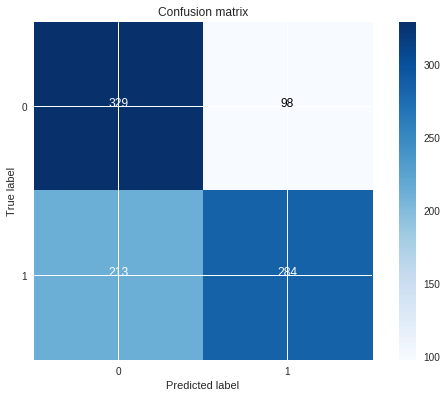

In [28]:

lr = LogisticRegression(C = 100, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

recall_val = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
precision_val = cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])
f1_score_val = 2*((recall_val*precision_val)/(recall_val+precision_val))

print("Recall metric in the testing dataset: {}".format(recall_val) )
print("Precision metric in the testing dataset: {}".format(precision_val))
print("f-score on the test dataset: {}".format(f1_score_val) )
f1_temp = f1_score(y_test_undersample, y_pred_undersample)
print(f1_temp)

# print (f1_score_val)
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_conf_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [0]:
# testing the model on provided test dataset
unseen_data = data = pd.read_csv('https://drive.google.com/uc?export=view&id=1yVPwqGQC2gkhF2bcbue9j3184ryAJRtG')
y_pred_unseen_data = lr.predict(unseen_data.values).astype(int)
y_pred_unseen_data
np.savetxt("predictions.csv", y_pred_unseen_data , delimiter=",")
from google.colab import files
files.download('predictions.csv')

In [30]:
!dir

predictions.csv  sample_data


### Interpreting results

We got a recall score of 0.579 on undersampled test dataset. Not bad, but not very good. We can use SMOTE/ADASYN to beat this (hopefully)

## SMOTE splitting

We'll use SMOTE (Synthetic Minority Oversampling Technique) to create(synthesize) more samples of minority class. The recall score we got earlier might be less as we imputed more than 80% of the data to balance the dataset. 

In [0]:
sm = SMOTE(random_state = 12, ratio = 1.0)
X_train_smoted, y_train_smoted = sm.fit_sample(X_train, y_train)
# X_train_smoted, y_train_smoted = sm.fit_sample(X_train, y_train.values.ravel())
print(type(X_train_smoted))

In [0]:
# checking the lengths of new training set
print ("Number of SMOTEd training features: {}".format(len(X_train_smoted)))
print ("Number of SMOTEd test features: {}".format(len(y_train_smoted)))
# print (y_train_smoted)
X_train.head()
y_train_smoted_non_adopters = y_train_smoted[y_train_smoted == 1]
y_train_smoted_adopters = y_train_smoted[y_train_smoted == 0]
# print (y_train_smoted_adopters)
# print (y_train_smoted_non_adopters)
# print ("Number of SMOTEd training features: {}".format(len(y_train_smoted[y_train_smoted.adopter == 0])))
print ("Number of SMOTEd non-adopters (adopter = 0): {}".format(len(y_train_smoted_non_adopters)))
print ("Number of SMOTEd adopters (adopter = 1): {}".format(len(y_train_smoted_adopters)))

We have around 59604 instances each of both the classes, which is better than simple undersampling and having only 2156 instances.



In [0]:
TODO: Convert the train sets to dataframes from ndarray and recaluclate the recalls

X_train_smoted
X_train.head()